In [0]:
import re             
import nltk           
import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns

In [0]:
def remove_pattern(input_txt, pattern):   
    r = re.findall(pattern, input_txt)   
    for i in r:        
        input_txt = re.sub(i, '', input_txt)     
                       
    return input_txt   

In [44]:
df = pd.read_csv('Angry.csv')
df = df.astype(str)
df['result'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*") 
df['result'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', a,flags=re.MULTILINE)for a in df['result']]
df['result'] = [x.lower() for x in df['result']]
df['result'] = df['result'].str.replace("[^a-zA-Z#]", " ") 
df['result'] = df['result'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()
df.to_csv('angry_angry.csv')  

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
tokenized_tweet = df['result'].apply(lambda x: x.split())
tokenized_tweet.head()

0                         [#sad, #annoyed, #noonetext]
1                         [#sad, #annoyed, #noonetext]
2                                        [angry, girl]
3    [those, that, feel, need, stockpile, hand, wipes]
4    [those, that, feel, need, stockpile, hand, wipes]
Name: result, dtype: object

In [46]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                         [#sad, #annoy, #noonetext]
1                         [#sad, #annoy, #noonetext]
2                                      [angri, girl]
3    [those, that, feel, need, stockpil, hand, wipe]
4    [those, that, feel, need, stockpil, hand, wipe]
Name: result, dtype: object

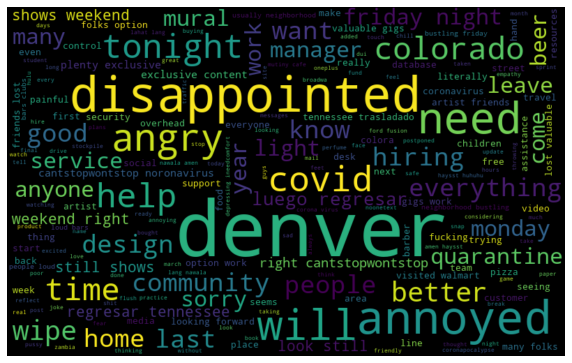

In [47]:
all_words = ' '.join([text for text in df['result']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(df['result'])

# unnesting list
HT_regular = sum(HT_regular,[])


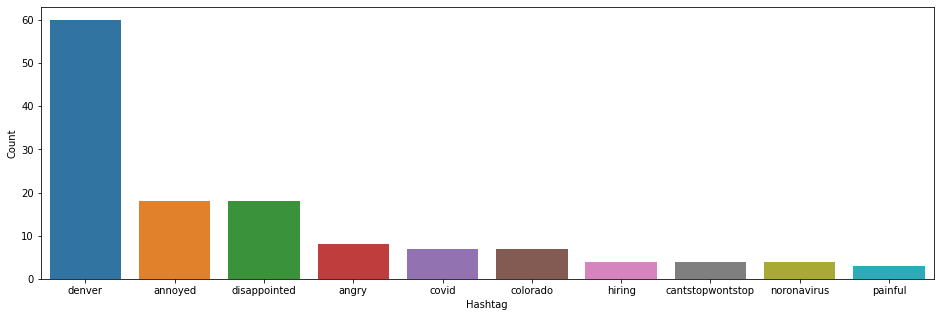

In [50]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()